# Tweeter_Sentiment_Analysis 

Let’s go through the problem statement.The problem statement is as follows:

The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets.

Formally, given a training sample of tweets and labels, where label ‘1’ denotes the tweet is racist/sexist and label ‘0’ denotes the tweet is not racist/sexist, your objective is to predict the labels on the given test dataset.

# Importing the Libraries

In [1]:
import re                           # for regular expressions 
import nltk                         # for text manipulation  
import numpy as np                  # for mathematical and logical operation on arrays
import pandas as pd                 # for data mainpulation
import seaborn as sns               # for visualsation
import matplotlib.pyplot as plt     # for visualisation

# Loading the Data

In [2]:
train = pd.read_csv("tweets.csv")

#   Data Inspection

In [3]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
train.tail()

,id,label,tweet
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."
31961,31962,0,thank you @user for you follow


In [5]:
train.shape

(31962, 3)

#### Let’s check out a few non racist/sexist tweets.

In [6]:
train[train['label']==0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


#### Let’s check out a few racist/sexist tweets.

In [7]:
train[train['label']==1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


#### Now we will check the distribution of length of the tweets, in terms of words, in both train data.

In [8]:
length_train = train['tweet'].str.len()

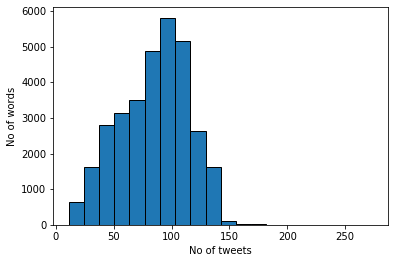

In [9]:
plt.hist(length_train,bins=20,histtype='bar',label="train_tweets",edgecolor='k')
plt.xlabel("No of tweets")
plt.ylabel("No of words")
plt.show()

# Data Cleaning
  Now I will remove irrelevant data and make data consistent

Combine both the datasets for cleaning 

In [10]:
combi = train.append(test,ignore_index=True)
combi.shape

NameError: name 'test' is not defined

In [ ]:
combi.head(10)

In [ ]:
combi.tail()

User defined function to remove unwanted pattern

In [ ]:
def remove_pattern(input_txt,pattern):
    r = re.findall(pattern,input_txt)
    for i in r:
        input_txt = re.sub(i,' ',input_txt)
    return input_txt        

For removing @user handle as it does not give us any information about user sentiment  

In [ ]:
combi['clean_tweet'] = np.vectorize(remove_pattern)(combi['tweet'],"@[\w]*")

In [ ]:
combi.head(10)

For Removing Punctuations, Numbers, and Special Characters

In [ ]:
combi['clean_tweet'] = combi['clean_tweet'].str.replace("[^a-zA-Z#]"," ")
combi.head(10)

For removing short words like "hmm","Oh"....

In [ ]:
combi['clean_tweet'] = combi['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combi.head(10)

Text Normalisation 

In [ ]:
tokenized_tweet = combi['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

In [ ]:
from nltk.stem.porter import *
st = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x:[st.stem(i) for i in x])
tokenized_tweet.head(10)

In [ ]:
for x in range(len(tokenized_tweet)):
    tokenized_tweet[x] = ' '.join(tokenized_tweet[x])
combi['clean_tweet'] = tokenized_tweet 
combi.head(10)

Now data is Cleaned 

# Exploring the Cleaned Data



#### Let’s visualize all the words our data using the wordcloud plot.

In [ ]:
all_words = ' '.join([text for text in combi['clean_tweet']]) 
from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bessel") 
plt.axis('off') 
plt.show()

#### Let’s visualize the words in non racist/sexist tweets using the wordcloud plot.

In [ ]:
positive_words = " ".join([text for text in combi['clean_tweet'][combi['label']==0]])
wordcloud = WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(positive_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()



#### Let’s visualize the words in racist/sexist tweets using the wordcloud plot.

In [ ]:
negative_words = " ".join([text for text in combi['clean_tweet'][combi['label']==1]])
wordcloud = WordCloud(width=800,height=500,random_state=18,max_font_size=110).generate(negative_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

Understanding The impact of Hashtags On Tweet Sentiment

In [ ]:
combi.head()

In [ ]:
# function to collect hashtag
def hashtag_extract(x):
    hashtags =[]
    for i in x:
        ht = re.findall("#(\w+)",i)
        hashtags.append(ht)
    return hashtags

In [ ]:
# extracting hashtags from non racist/sexist tweets 
ht_positive = hashtag_extract(combi['clean_tweet'][combi['label']==0])

# extracting hashtags from racist/sexist tweets
ht_negative = hashtag_extract(combi['clean_tweet'][combi['label']==1])
ht_positive = sum(ht_positive,[]) 
ht_negative = sum(ht_negative,[])




#### Let's visualize  Non Racist/Sexist Tweets Hashatag with their count number

In [ ]:
import nltk
a = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag':list(a.keys()),'Count':list(a.values())})
d = d.nlargest(columns="Count",n = 20)     #selecting top 20 hashtgs 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x="Hashtag",y = "Count") 
ax.set(ylabel = 'Count') 
plt.show()




#### Let's visualize  Non Racist/Sexist Tweets Hashatag with their count number Racist/Sexist Tweets 

In [ ]:
import nltk
b = nltk.FreqDist(ht_negative)
e = pd.DataFrame({'Hashtag':list(b.keys()),'Count':list(b.values())})
e = e.nlargest(columns="Count",n = 20)     #selecting top 20 hashtgs 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x="Hashtag",y = "Count") 
ax.set(ylabel = 'Count') 
plt.show()

# Conclusion

-  There are maximum number of Non Racist/Sexist tweets as compare to Racist/Sexist Tweet
-  In Non/Racist Tweets  hashtag like love,posit,smile..etc were used more frequently in twets
-  In Racist/Sexist Tweets hashtag like trump,polit,black...etc were used more frequently